In [3]:
import imagegenerator
import analyzer

import tensorflow as tf
from tensorflow.keras import layers
import models
from CAM import *
from pipeline import *

In [4]:
data_path = 'images/subset'
results_path = 'results'
batch_size = 32
labels = ['Afghan hound', 'Maltese dog', 'Scottish deerhound']
img_size = (224,224)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
dropout (Dropout)            (None, 53, 53, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                1

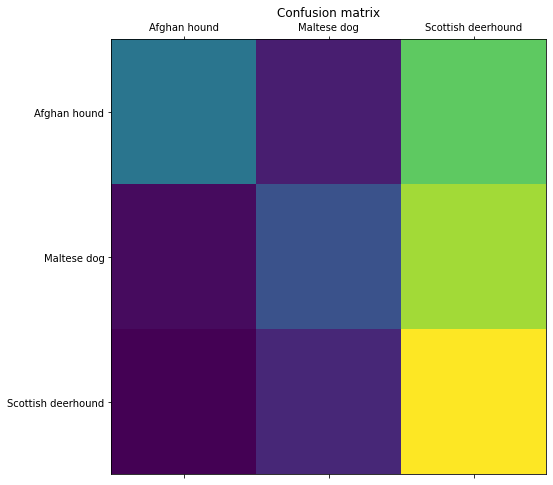

In [5]:
model, img_gen = run_simple_model(save_model=True)

In [33]:
x, y = img_gen.test_array(3)
print(len(x))

Found 143 files belonging to 3 classes.
96


In [34]:
IMG_NUMB = 142
img_array = keras.preprocessing.image.img_to_array(x[IMG_NUMB])
img_array = np.expand_dims(img_array, axis=0)
preds = model.model.predict(img_array)
heatmap = make_gradcam_heatmap(img_array, model.model, 'conv2d_3')
plt.matshow(heatmap)
plt.show()
save_and_display_gradcam(x[IMG_NUMB],heatmap, alpha = 0.001)

IndexError: index 142 is out of bounds for axis 0 with size 96

Found 143 files belonging to 3 classes.


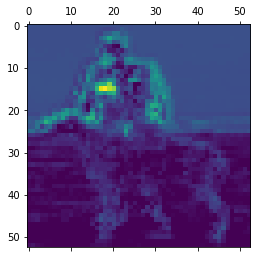

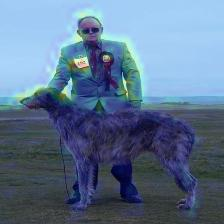

In [11]:
make_heatmap_from_test_img(model, img_gen, 'conv2d_1', 112)